## 第三章 模型搭建和评估-评估

根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。

加载下面的库

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [53]:
%matplotlib inline

In [54]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

**任务：加载数据并分割测试集和训练集**

In [38]:
from sklearn.model_selection import train_test_split

In [55]:
# 一般先取出X和y后再切割，有些情况会使用到未切割的，这时候X和y就可以用,x是清洗好的数据，y是我们要预测的存活数据'Survived'
data = pd.read_csv('clear_data.csv')
train = pd.read_csv('train.csv')
X = data
y = train['Survived']

In [56]:
# 对数据集进行切割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [57]:
# 默认参数逻辑回归模型
lr = LogisticRegression()
lr.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 模型评估

* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

【思考】：将上面的概念进一步的理解，大家可以做一下总结

【思考回答】：
- 即使学习器在训练集上表现得很好，它在测试集上的表现也不一定很好，它可能把训练样本自身的一些特点当作潜在样本都会具有的一般性质，导致泛化能力下降，我们称之为过拟合。我们的实际目的其实是希望学习器能在新样本有很好的表现，这就要对模型的泛化能力进行模型评估。
- 如何进行模型评估和选择？有几种常见的评估方法：
    1. 留出法
    2. 交叉验证法
    3. 自助法
- 交叉验证是一种普遍的模型评估方法，就是重复的使用数据，把得到的样本数据进行切分，组合为不同的训练集和测试集，用训练集来训练模型，用测试集来评估模型预测的好坏。在此基础上可以得到多组不同的训练集和测试集，某次训练集中的某样本在下次可能成为测试集中的样本，即所谓“交叉”。
- 交叉验证中常用的是k折交叉验证（k-fold cross-validation），通过对 k 个不同分组训练的结果进行平均来减少方差，因此模型的性能对数据的划分就不那么敏感。k通常取5或10。
- TP(True Positive)：被预测成了正类的正类，即正确预测的正类

　　FP(False Positive)：被预测成了正类的负类

　　TN(True Negetive)：被预测成了负类的负类，即正确预测的负类

　　FN(False Negetive)：被预测成了负类的正类
- 准确率（precision）：在预测结果中，正确预测的正类数 / 预测为正类的数量 : TP / (TP+FP）
- 召回率（Recall）：在预测结果中，正确预测的正类数 / 原本即为正类的数量 : TP / (TP+FN）
- f-分数：用precision和recall两个指标不直观，索性把他们合并为一个变量——F-measure：Recall * Precision * 2 / (Recall + Precision)（越大越好，1为理想状态，此时precision为1，recall为1）

#### 任务一：交叉验证
* 用10折交叉验证来评估之前的逻辑回归模型
* 计算交叉验证精度的平均值

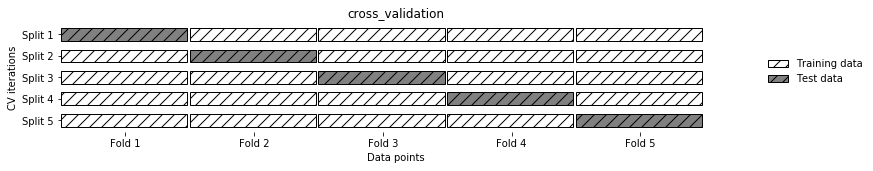

In [6]:
#提示：交叉验证
Image('Snipaste_2020-01-05_16-37-56.png')

#### 提示4
* 交叉验证在sklearn中的模块为`sklearn.model_selection`

In [42]:
from sklearn.model_selection import cross_val_score

In [58]:
lr = LogisticRegression(C=100) # C值100，正则项系数λ=0.01
scores = cross_val_score(lr, X_train, y_train, cv=10) # 逻辑回归，10折交叉验证，参数意义见参考

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages

In [59]:
# k折交叉验证分数
scores

array([0.82352941, 0.77941176, 0.80597015, 0.82089552, 0.8358209 ,
       0.88059701, 0.72727273, 0.84848485, 0.75757576, 0.71212121])

In [45]:
# 平均交叉验证分数
print("Average cross-validation score: {:.3f}".format(scores.mean()))

Average cross-validation score: 0.799


【参考】[https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

#### 思考4
* k折越多的情况下会带来什么样的影响？

【思考回答】一般而言，k折越多，评估结果的稳定性和保真性越高，不过整个计算复杂度越高。一种特殊的情况是k=m，m为数据集样本个数，这种特例称为留一法，结果往往比较准确。



#### 任务二：混淆矩阵
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运用到什么任务中的

【思考回答】二分类问题的混淆矩阵是一个 2 维方阵，它主要用于评估二分类问题的好坏，如下图所示。它主要运用于二分类任务中。实际上，多分类问题依然可以转换为二分类问题进行处理。

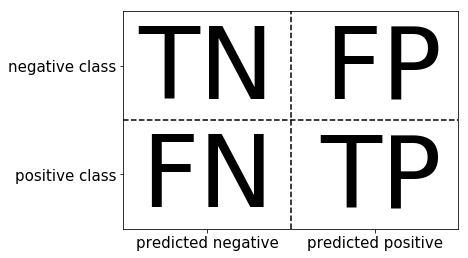

In [40]:
#提示：混淆矩阵
Image('Snipaste_2020-01-05_16-38-26.png')

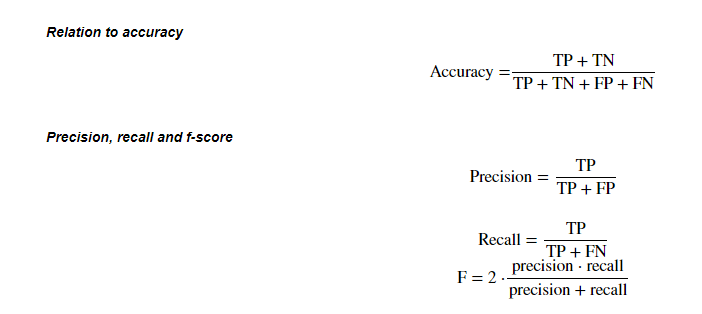

In [42]:
#提示：准确率 (Accuracy),精确度（Precision）,Recall,f-分数计算方法
Image('Snipaste_2020-01-05_16-39-27.png')

#### 提示5
* 混淆矩阵的方法在sklearn中的`sklearn.metrics`模块
* 混淆矩阵需要输入真实标签和预测标签
* 精确率、召回率以及f-分数可使用`classification_report`模块

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
# 训练模型
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
# 模型预测结果
pred = lr.predict(X_train)

In [63]:
# 混淆矩阵
confusion_matrix(y_train, pred)

array([[350,  62],
       [ 71, 185]], dtype=int64)

In [64]:
from sklearn.metrics import classification_report

In [65]:
# 精确率、召回率以及f1-score
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       412
           1       0.75      0.72      0.74       256

    accuracy                           0.80       668
   macro avg       0.79      0.79      0.79       668
weighted avg       0.80      0.80      0.80       668



【思考】
* 如果自己实现混淆矩阵的时候该注意什么问题

【思考回答】在 scikit-learn 中, 计算混淆矩阵用来评估分类的准确度。  
　　按照定义, 混淆矩阵 C 中的元素 Ci,j 等于真实值为组 i , 而预测为组 j 的观测数(the number of observations)。 所以对于二分类任务, 预测结果中, 正确的负例数(true negatives, TN)为 C0,0; 错误的负例数(false negatives, FN)为 C1,0; 真实的正例数为 C1,1; 错误的正例数为 C0,1。  
　　如果 labels 为 None, scikit-learn 会把在出现在 y_true 或 y_pred 中的所有值添加到标记列表 labels 中, 并排好序。 

#### 任务三：ROC曲线
* 绘制ROC曲线

【思考】什么是ROC曲线，ROC曲线的存在是为了解决什么问题？

【思考回答】ROC的全称是Receiver Operating Characteristic Curve，中文名字叫“受试者工作特征曲线”，顾名思义，其主要的分析方法就是画这条特征曲线。
$$T P R=\frac{T P}{T P+F N}$$ ， $$F P R=\frac{F P}{F P+T N}$$
在ROC曲线图中，每个点以对应的FPR值为横坐标，以TPR值为纵坐标，其它符号的意义前面提过。

ROC曲线的存在主要用于衡量模型的泛化性能，即分类效果的好坏。

【参考】[ROC曲线学习总结](https://blog.csdn.net/qq_30992103/article/details/99730059)

#### 提示6
* ROC曲线在sklearn中的模块为`sklearn.metrics`
* ROC曲线下面所包围的面积越大越好

In [66]:
from sklearn.metrics import roc_curve

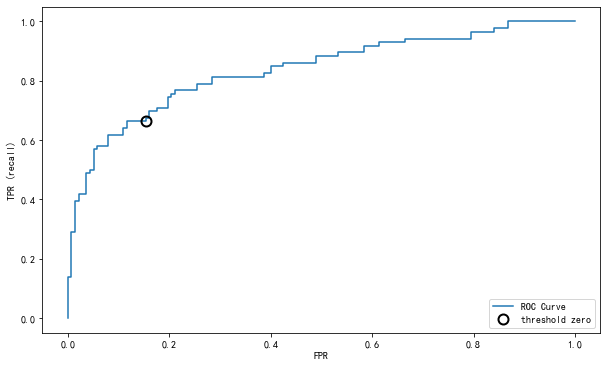

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds)) # 取得最接近0阈值的索引值
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

【参考】[https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

#### 思考6
* 对于多分类问题如何绘制ROC曲线

【思考回答】  
经典的ROC曲线适用于对二分类问题进行模型评估，通常将它推广到多分类问题的方式有两种：

1. 对于每种类别，分别计算其将所有样本点的预测概率作为阈值所得到的TPR和FPR值(是这种类别为正，其他类别为负)，最后将每个取定的阈值下，对应所有类别的TPR值和FPR值分别求平均，得到最终对应这个阈值的TPR和FPR值  
2. 首先，对于一个测试样本：1）标签只由0和1组成，1的位置表明了它的类别（可对应二分类问题中的“正”），0就表示其他类别（“负”）；2）要是分类器对该测试样本分类正确，则该样本标签中1对应的位置在概率矩阵P中的值是大于0对应的位置的概率值的。  

上面的两个方法得到的ROC曲线是不同的，当然曲线下的面积AUC也是不一样的。 在python中，方法1和方法2分别对应sklearn.metrics.roc_auc_score函数中参数average值为’macro’和’micro’的情况。



【参考】[ROC曲线学习总结](https://blog.csdn.net/qq_30992103/article/details/99730059)

【思考】你能从这条ROC曲线的到什么信息？这些信息可以做什么？

【思考回答】根据曲线位置，把整个图划分成了两部分，曲线下方部分的面积被称为AUC（Area Under Curve），用来表示预测准确性，AUC值越高，也就是曲线下方面积越大，说明预测准确率越高。曲线越接近左上角（X越小，Y越大），预测准确率越高。对角线对应于“随机猜测”模型，而点(0,1)则对应于将所有正例排在所有反例之前的“理想模型”。从本图中看，ROC曲线在对角线之上，肯定比“随机猜测”模型要好。